In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # suppress warnings

In [2]:
import random
import numpy as np
import tensorflow as tf

In [3]:
random.seed(1693)
np.random.seed(1693)
tf.random.set_seed(1693)

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
train_images, test_images = train_images / 255.0, test_images / 255.0
print("0. the 16th image in the X train set:", train_images[15])
print("1. the Y label of the 16th item in the original train set:", train_labels[15])
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print("2. the actual description of the 16th item's label:", class_names[train_labels[15]])

0. the 16th image in the X train set: [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.    

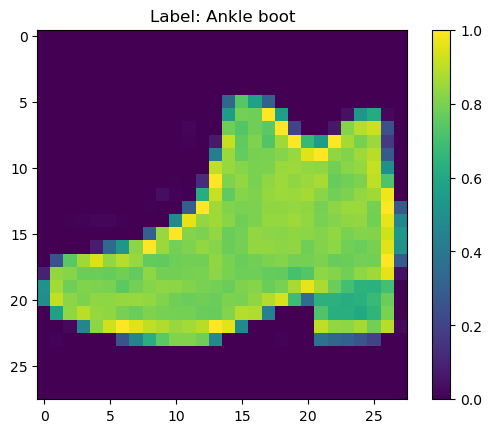

In [12]:
import matplotlib.pyplot as plt
# Visualization: Display the 16th image
plt.imshow(train_images[15])
plt.colorbar()
plt.title(f"Label: {class_names[train_labels[15]]}")
plt.show()

In [13]:
train_images = train_images / 255.0
test_images = test_images / 255.0
print("3. the scaled X values of the 16th item in the train set: ", train_images[15].reshape(28, 28))
from tensorflow.keras.utils import to_categorical
train_labels_one_hot = to_categorical(train_labels, 10)
test_labels_one_hot = to_categorical(test_labels, 10)
print("4. the one-hot coded Y label of the 16th item in the train set: ", train_labels_one_hot[15])

3. the scaled X values of the 16th item in the train set:  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(5, activation='relu'),
    Dropout(0.15),
    Dense(4, activation='tanh'),
    Dense(10, activation='softmax')
])

print("5. Summary of the model:")
model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels_one_hot,
                    epochs=5, batch_size=2000, 
                    validation_data=(test_images, test_labels_one_hot), verbose=0)

5. Summary of the model:


C:\Users\sunet\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │           3,925 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,999 (15.62 KB)

 Trainable params: 3,999 (15.62 KB)

 Non-trainable params: 0 (0.00 B)

6. train accuracy rate for the 4th epoch: 0.19751666486263275


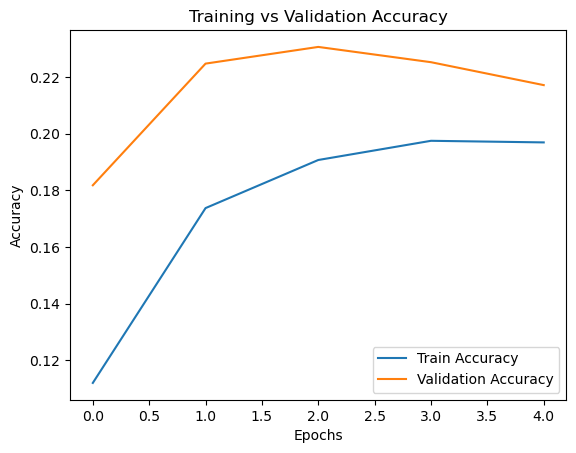

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
7. the predicted class label for the 16th item in the train set: Ankle boot


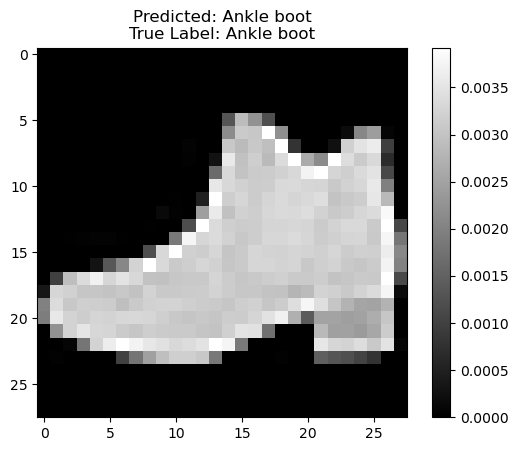

In [15]:
train_acc_4th_epoch = history.history['accuracy'][3]
print("6. train accuracy rate for the 4th epoch:", train_acc_4th_epoch)

# Visualizing the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

prediction = model.predict(train_images[15:16])
predicted_label = class_names[np.argmax(prediction)]
print("7. the predicted class label for the 16th item in the train set:", predicted_label)

# Visualizing the 16th image and the prediction
plt.imshow(train_images[15], cmap='gray')
plt.title(f"Predicted: {predicted_label}\nTrue Label: {class_names[train_labels[15]]}")
plt.colorbar()
plt.show()